In [38]:
import numpy as np
import matplotlib.pyplot as plt

# function to load the sparta+ pred file
def loadpred(file_name):
    f = open(file_name)
    r = f.readlines()
    content = []
    for i in range(27,len(r)):
        content.append(r[i].split())
    return content



In [56]:
# load pred file and seperate them in to different types of Chemical Shifts
pred = loadpred("2cef.md.pdb_pred.tab")

C_list = []
CA_list = []
CB_list = []
HA_list = []
HN_list = []
N_list = []
for i in range(len(pred)):
    if pred[i][2] == 'C':
        C_list.append(pred[i])
    if pred[i][2] == 'CA':
        CA_list.append(pred[i])
    if pred[i][2] == 'CB':
        CB_list.append(pred[i])
    if pred[i][2] == 'HA' or 'HA2':
        HA_list.append(pred[i])
    if pred[i][2] == 'HN':
        HN_list.append(pred[i])
    if pred[i][2] == 'N':
        N_list.append(pred[i])



In [57]:
# Prepare plot data
C_2shift = [float(item[3]) for item in C_list]
CA_2shift = [float(item[3]) for item in CA_list]
CB_2shift = [float(item[3]) for item in CB_list]
HA_2shift = [float(item[3]) for item in HA_list]
HN_2shift = [float(item[3]) for item in HN_list]
N_2shift = [float(item[3]) for item in N_list]

C_2shift.append(None)
N_2shift.append(None)

res_list = [item[0]+item[1] for item in CA_list]

print(res_list)

['1C', '2R', '3K', '4A', '5G', '6V', '7G', '8Q', '9S', '10W', '11K', '12E', '13N', '14S', '15P', '16L', '17N', '18V', '19S']


In [66]:
# CA Experimental
Experimental_data_raw = [None,None,56.2,52.4,40,62.3,45.2,55.7,58,57.5,55.6,56.3,53.3,55.8,None,55.16,53.1,62,60]
RCoil_data = [float(item[5]) for item in CA_list]
Experimental_data = [Experimental_data_raw[i]-RCoil_data[i] for i in range(len(RCoil_data))]

print(Experimental_data)


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

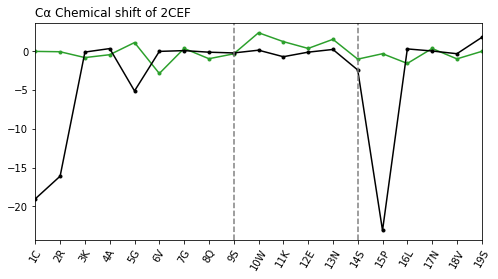

In [65]:
# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift,'.-',label='CA',color="tab:green")
plt.plot(Experimental_data,'.-',label='CA',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")


plt.show()